# Alternative splicing events per gene

This notebook creates a single figure that summarizes the number of lternative splicing events per gene, **AS_events_per_gene.pdf**.

## Pre-requisite

This figure generation assumes `countGenesAndEvents.ipynb` has been run.  

In [1]:
suppressMessages({
    options(warn = -1) 
    library(ggplot2)
    library(dplyr)
    library(tidyverse)
})

**"../data/gene_as.tsv"** was generated by **countGenesAndEvents.ipynb**

In [2]:
filename <- "../data/gene_as.tsv"
gene_as <- read.table(filename, header=TRUE, sep="\t", skipNul=FALSE, stringsAsFactors = FALSE)
head(gene_as,2)

,GeneJunction,ASE,ASE_IDX,Tissue,counts,Display,GeneSymbol,GeneID,chr,logFC,AveExpr,t,PValue,AdjPVal,B
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,XIST-2253,A3SS,2253,adipose_subcutaneous,3,Adipose (sc),XIST,ENSG00000229807.11,chrX,-4.410265,3.196555,-35.99306,1.037929e-151,7.98686e-148,303.0562
2,XIST-2252,A3SS,2252,adipose_subcutaneous,3,Adipose (sc),XIST,ENSG00000229807.11,chrX,-2.409615,3.647928,-21.32460,1.906043e-75,7.33350e-72,152.3585


### Figure for Genes with more than 10 alternative splicing events

In [3]:
# Colors 
darkblue <- "#3c5488"
red <- "#e64b35"
nearlyblack <- "#040C04"
purple <- "#790079"
orange = "#ff9900"

In [4]:
res <- gene_as %>% 
       group_by(GeneSymbol) %>% 
       count(GeneSymbol) %>% 
       arrange(desc(n)) %>% 
       as.data.frame()
res$GeneSymbol <- factor(res$GeneSymbol, levels = res$GeneSymbol)
#Add number of tissues
nTissues <- rep(NA, length(res))
for (i in 1:nrow(res)) {
  df_gene <- gene_as %>% filter(GeneSymbol == res$GeneSymbol[i])
  nTissues[i] <- length(unique(df_gene$Tissue))
}
res$Tissues <- nTissues

sorted_res <- res
sorted_res$Tissues <- as.numeric(as.character(sorted_res$Tissues))
sorted_res <- res[order(-res$Tissues),]
sorted_res <- sorted_res[sorted_res$Tissues > 4, ]
drops <- c("n")
sorted_res <- sorted_res[ , !(names(sorted_res) %in% drops)]

n_genesymbols <- length(res$GeneSymbol)
n_events <- dim(gene_as)[1]
message("We obtained data for ", n_events," events in ", n_genesymbols, " genes.")

We obtained data for 4728 events in 2282 genes.



Saving 6.67 x 6.67 in image

Saved plot as ../pdf/AS_events_per_gene.pdf



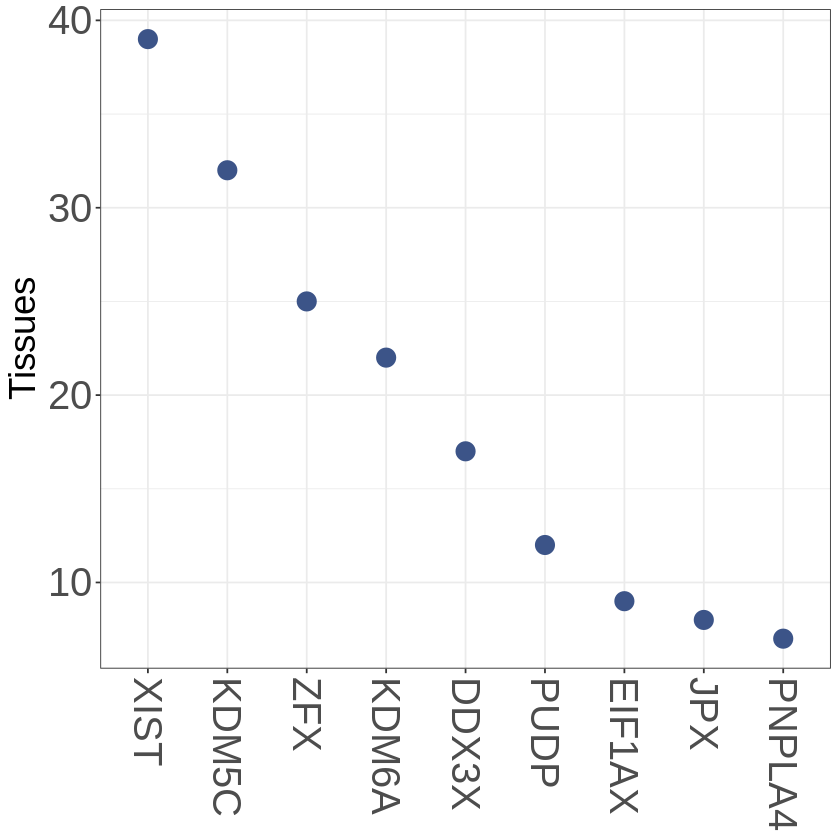

In [5]:
g <- ggplot(sorted_res, aes(x = reorder(GeneSymbol,-Tissues), y = Tissues)) +
  geom_point(colour = darkblue, size = 5) +
  theme_bw() +
  theme(axis.text.x = element_text(size=24, angle = 270, hjust = 0.0, vjust = 0.5),
        axis.text.y = element_text(size=24),
        axis.title.x = element_blank(),
        axis.title.y = element_text(face="plain", colour="black", size=22),
        legend.title=element_blank(),
        legend.position = "none" ) +
  ylab(paste("Tissues"))
ggsave("../pdf/AS_events_per_gene.pdf",g)
message("Saved plot as ../pdf/AS_events_per_gene.pdf")
g


# Additionally count genes expressed in 2 or more tissues

In [6]:
sorted_res <- res
sorted_res$Tissues <- as.numeric(as.character(sorted_res$Tissues))
sorted_res <- res[order(-res$Tissues),]
sorted_res <- sorted_res[sorted_res$Tissues > 1, ]
drops <- c("n")
sorted_res <- sorted_res[ , !(names(sorted_res) %in% drops)]
sorted_res
write.table(sorted_res, "../data/two_more_more_as.tsv", quote=FALSE, sep="\t")

,GeneSymbol,Tissues
,<fct>,<int>
1,XIST,39
3,KDM5C,32
4,ZFX,25
5,KDM6A,22
2,DDX3X,17
10,PUDP,12
30,EIF1AX,9
33,JPX,8
66,PNPLA4,7


### Appendix - Metadata

For replicability and reproducibility purposes, we also print the following metadata:

1. Checksums of **'artefacts'**, files generated during the analysis and stored in the folder directory **`data`**
2. List of environment metadata, dependencies, versions of libraries using `utils::sessionInfo()` and [`devtools::session_info()`](https://devtools.r-lib.org/reference/session_info.html)

### Appendix 1. Checksums with the sha256 algorithm

In [7]:
notebookid   = "create_as_events_per_gene"

### Appendix 2. Libraries metadata

In [8]:
dev_session_info   <- devtools::session_info()
utils_session_info <- utils::sessionInfo()

message("Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..")
saveRDS(dev_session_info, file = paste0("../metadata/", notebookid, "_devtools_session_info.rds"))
message("Done!\n")

message("Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..")
saveRDS(utils_session_info, file = paste0("../metadata/", notebookid ,"_utils_info.rds"))
message("Done!\n")

dev_session_info$platform
dev_session_info$packages[dev_session_info$packages$attached==TRUE, ]

Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..

Done!


Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..

Done!




 setting  value                       
 version  R version 3.6.1 (2019-07-05)
 os       Ubuntu 18.04.4 LTS          
 system   x86_64, linux-gnu           
 ui       X11                         
 language en_US.UTF-8                 
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       Etc/UTC                     
 date     2020-09-02                  

,package,ondiskversion,loadedversion,path,loadedpath,attached,is_base,date,source,md5ok,library
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<fct>
dplyr,dplyr,0.8.5,0.8.5,/opt/conda/lib/R/library/dplyr,/opt/conda/lib/R/library/dplyr,TRUE,FALSE,2020-03-07,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
forcats,forcats,0.5.0,0.5.0,/opt/conda/lib/R/library/forcats,/opt/conda/lib/R/library/forcats,TRUE,FALSE,2020-03-01,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
ggplot2,ggplot2,3.3.0,3.3.0,/opt/conda/lib/R/library/ggplot2,/opt/conda/lib/R/library/ggplot2,TRUE,FALSE,2020-03-05,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
purrr,purrr,0.3.4,0.3.4,/opt/conda/lib/R/library/purrr,/opt/conda/lib/R/library/purrr,TRUE,FALSE,2020-04-17,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
readr,readr,1.3.1,1.3.1,/opt/conda/lib/R/library/readr,/opt/conda/lib/R/library/readr,TRUE,FALSE,2018-12-21,CRAN (R 3.6.3),NA,/opt/conda/lib/R/library
repr,repr,1.1.0,1.1.0,/opt/conda/lib/R/library/repr,/opt/conda/lib/R/library/repr,TRUE,FALSE,2020-01-28,CRAN (R 3.6.3),NA,/opt/conda/lib/R/library
stringr,stringr,1.4.0,1.4.0,/opt/conda/lib/R/library/stringr,/opt/conda/lib/R/library/stringr,TRUE,FALSE,2019-02-10,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
tibble,tibble,3.0.1,3.0.1,/opt/conda/lib/R/library/tibble,/opt/conda/lib/R/library/tibble,TRUE,FALSE,2020-04-20,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
tidyr,tidyr,1.1.0,1.1.0,/opt/conda/lib/R/library/tidyr,/opt/conda/lib/R/library/tidyr,TRUE,FALSE,2020-05-20,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
